# 实验三 回归与聚类

In [2]:
# 下载字体
!wget https://github.com/wkwbk/ipynb/raw/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf

--2025-04-16 00:55:25--  https://github.com/wkwbk/ipynb/raw/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wkwbk/ipynb/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf [following]
--2025-04-16 00:55:25--  https://raw.githubusercontent.com/wkwbk/ipynb/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9751960 (9.3M) [application/octet-stream]
Saving to: ‘SimHei.ttf’

SimHei.ttf          100%[===================>]   9.30M  --.-KB/s    in 0.08s   

2025-04-16 00:55:26 (121 MB/s) - ‘SimHei.ttf

In [3]:
# 添加字体文件
import matplotlib.font_manager as fm

fm.fontManager.addfont('./SimHei.ttf')

系数: [2.]
截距: 0.0
均方误差: 0.0
R2分数: 1.0


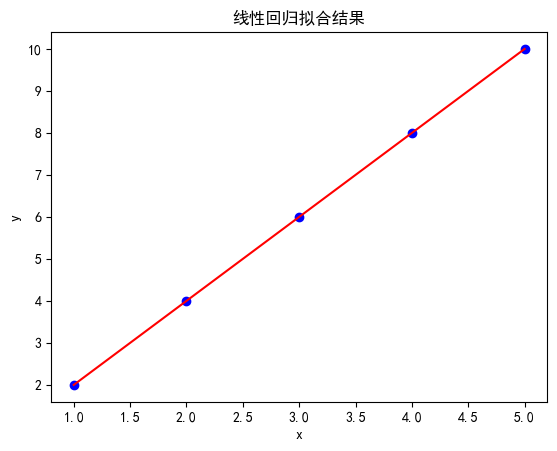

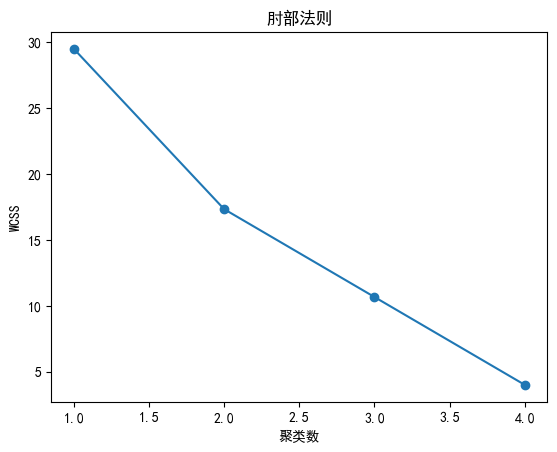

聚类标签: [0 1 0 1 1 0]
聚类中心:
 [[2.         0.66666667]
 [3.         3.33333333]]
轮廓系数: 0.1757284391090923


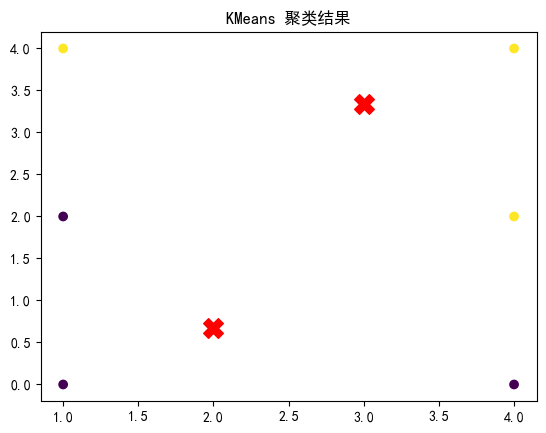

手动线性回归系数: [2.]
手动线性回归截距: 5.662137425588298e-15
手动均方误差: 6.33060876439862e-29


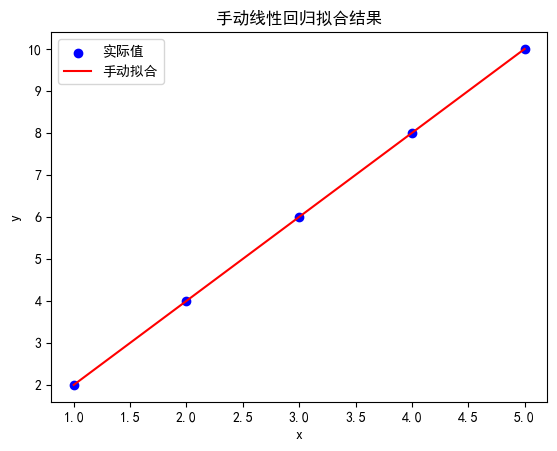

手动 KMeans 聚类中心:
 [[2.5 1. ]
 [2.5 4. ]]
手动聚类标签: [0 1 0 0 1 0]
手动轮廓系数: 0.17267602394489975


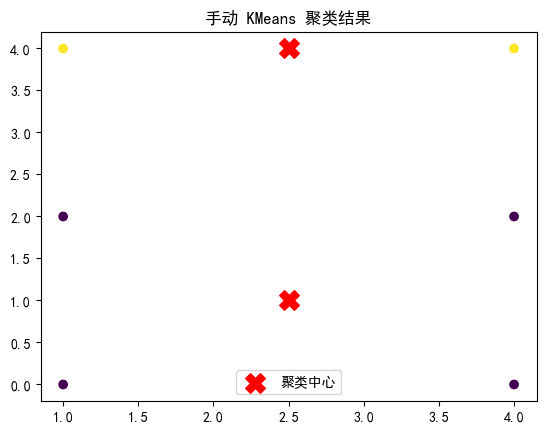

In [4]:
# 1. 线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签

# 生成数据
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# 训练模型
model = LinearRegression()
model.fit(X, y)

# 预测与评估
y_pred = model.predict(X)
print("系数:", model.coef_)
print("截距:", model.intercept_)
print("均方误差:", mean_squared_error(y, y_pred))
print("R2分数:", r2_score(y, y_pred))

# 可视化
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('线性回归拟合结果')
plt.show()

# 2. KMeans 聚类
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 生成数据
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# 肘部法则选择最佳聚类数
wcss = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 5), wcss, marker='o')
plt.xlabel('聚类数')
plt.ylabel('WCSS')
plt.title('肘部法则')
plt.show()

# 选择k=2进行聚类
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
print("聚类标签:", labels)
print("聚类中心:\n", kmeans.cluster_centers_)
print("轮廓系数:", silhouette_score(X, labels))

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red')
plt.title('KMeans 聚类结果')
plt.show()

# 3. 进阶内容:手动实现算法
# 手动实现线性回归(最小二乘法)
import numpy as np


class ManualLinearRegression:
    def __init__(self):
        self.coef_ = None  # 系数
        self.intercept_ = None  # 截距

    def fit(self, X, y):
        # 添加偏置项(截距)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # 计算正规方程解: 0 = (X^T X)^-1 X^T y
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_


# 测试手动实现
# 生成数据
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# 训练模型
manual_lr = ManualLinearRegression()
manual_lr.fit(X, y)

# 预测与评估
y_pred = manual_lr.predict(X)
print("手动线性回归系数:", manual_lr.coef_)
print("手动线性回归截距:", manual_lr.intercept_)
print("手动均方误差:", np.mean((y_pred - y) ** 2))

# 可视化(与 sklearn 结果对比)
plt.scatter(X, y, color='blue', label='实际值')
plt.plot(X, y_pred, color='red', label='手动拟合')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('手动线性回归拟合结果')
plt.show()


# 手动实现 KMeans 聚类
class ManualKMeans:
    def __init__(self, n_clusters=2, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        np.random.seed(random_state)

    def _init_centroids(self, X):
        # 随机选择初始聚类中心
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]

    def _assign_clusters(self, X):
        # 计算样本到各中心的距离,分配最近簇
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        # 更新聚类中心为簇内均值
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return new_centroids

    def fit(self, X):
        self._init_centroids(X)
        for _ in range(self.max_iter):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            # 若中心不再变化则提前终止
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def inertia_(self, X):
        # 计算总聚类误差(WCSS)
        total = 0
        for k in range(self.n_clusters):
            cluster_points = X[self.labels_ == k]
            total += np.sum((cluster_points - self.centroids[k]) ** 2)
        return total


# 测试手动实现
# 生成数据
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# 训练模型
manual_kmeans = ManualKMeans(n_clusters=2)
manual_kmeans.fit(X)
from sklearn.metrics import silhouette_score

# 输出结果
print("手动 KMeans 聚类中心:\n", manual_kmeans.centroids)
print("手动聚类标签:", manual_kmeans.labels_)
print("手动轮廓系数:", silhouette_score(X, manual_kmeans.labels_))

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=manual_kmeans.labels_, cmap='viridis')
plt.scatter(manual_kmeans.centroids[:, 0], manual_kmeans.centroids[:, 1],
            s=200, marker='X', c='red', label='聚类中心')
plt.title('手动 KMeans 聚类结果')
plt.legend()
plt.show()
